구두점 제거

In [1]:
import re
import string
from nltk.tokenize import word_tokenize

In [2]:
text = ["It is a pleasant evening", "Guests, who came from US arrived at the venue", "Food was tasty."]
tokens = [word_tokenize(s) for s in text]

In [3]:
pattern = re.compile("[%s]" % re.escape(string.punctuation))

In [4]:
newTokens = []

In [5]:
for sentence in tokens:
    newSentence = []
    
    for word in sentence:
        newWord = pattern.sub("", word)
        
        if newWord != "":
            newSentence.append(newWord)
            
    newTokens.append(newSentence)
    
newTokens

[['It', 'is', 'a', 'pleasant', 'evening'],
 ['Guests', 'who', 'came', 'from', 'US', 'arrived', 'at', 'the', 'venue'],
 ['Food', 'was', 'tasty']]

기사 내 어휘 통계

In [2]:
from bs4 import BeautifulSoup
import requests

In [3]:
url = "https://news.naver.com/main/hotissue/read.nhn?mid=hot&sid1=102&cid=1081137&iid=3399376&oid=003&aid=0008716863&ptype=052"

In [4]:
html = requests.get(url)

In [5]:
dom = BeautifulSoup(html.text, "html.parser")

In [6]:
article = dom.select('#articleBodyContents')

In [37]:
text = article[0].text

In [8]:
import re

In [9]:
p = re.compile("▶.*|.*=")

In [43]:
text = re.sub(p, "", text)

In [44]:
text

'\n\n\n\n\n// flash 오류를 우회하기 위한 함수 추가\nfunction _flash_removeCallback() {}\n\n \'댓글 조작 의혹\' 사건을 수사 중인 허익범(59·사법연수원 13기) 특별검사팀이 오는 25일 1심 선고를 앞두고 있는 \'드루킹\' 김모(49)씨 등 4인을 추가기소했다. 특검팀은 20일 김씨를 비롯해 \'서유기\' 박모(31)씨, \'솔본아르타\' 양모(35)씨, \'둘리\' 우모(32)씨 등을 업무방해 혐의로 추가기소하고 사건을 병합해달라고 요청했다. 특검팀은 지난 2월21일부터 3월21일까지 총 2196개의 ID와 매크로(자동입력 반복) 프로그램을 이용해 모두 5533개 기사 각 댓글 22만1729개의 공감 수를 조작한 혐의를 적용했다. 조작된 공감·비공감 수는 1131만116회에 달하는 것으로 조사됐다. 법원에 제출된 범죄일람표만 100권을 웃도는 것으로 전해진다. 이들 일당은 이번 혐의와 관련해 기존 사용하던 매크로 프로그램인 \'킹크랩\'에서 버전이 업데이트된 \'킹크랩 2\'를 동원한 것으로 조사됐다. 킹크랩은 매크로, IP 변동, 인터넷 정보 조작, 사용자 정보 등 기능이 담긴 통합 프로그램으로 이들 일당이 댓글 조작 범행을 위해 자체 개발한 것으로 알려졌다. 기존 킹크랩이 명령어가 입력된 아마존 서버와 이를 실행하는 휴대전화로 구분됐다면, \'킹크랩 2\'의 경우 휴대 전화 없이도 조작이 가능하다는 게 특검팀 설명이다. 드루킹 일당은 이 같은 버전 업데이트를 통해 휴대전화 등 비용을 절감하는 데서 나아가 네이버 포털사이트 어뷰징 단속 등을 피해갈 수 있었던 것으로 파악됐다. 앞서 댓글 조작에 사용된 휴대전화는 300대에 달하는 것으로 추정된다. 특검팀은 매크로 버전 업데이트 과정 등을 추가로 확인하고 있다. 아울러 지난 1월17일 이전 조작된 것으로 의심되는 댓글 약 8000만건에 대한 분석 작업도 병행하고 있다고 한다. 허익범 특검은 "굉장히 지루하고 고된 확인 작업이 필요하다"라고 말했다. 특검팀

In [12]:
from konlpy.tag import Kkma

In [13]:
k = Kkma()

In [14]:
tokens = k.nouns(text) 

In [15]:
len(tokens)

225

In [17]:
art = nltk.Text(tokens)

In [16]:
import nltk

In [24]:
art.vocab()

FreqDist({'수': 2, '이': 2, '오류': 1, '우회': 1, '함수': 1, '추가': 1, '댓': 1, '댓글': 1, '글': 1, '조작': 1, ...})

In [18]:
list(art.vocab())

['오류',
 '우회',
 '함수',
 '추가',
 '댓',
 '댓글',
 '글',
 '조작',
 '의혹',
 '사건',
 '수사',
 '중인',
 '허익',
 '허익범',
 '범',
 '59',
 '사법',
 '사법연수원',
 '연수원',
 '13',
 '13기',
 '기',
 '특별',
 '특별검사팀',
 '검사',
 '팀',
 '25',
 '25일',
 '일',
 '1',
 '1심',
 '심',
 '선고',
 '루',
 '루킹',
 '킹',
 '김',
 '김모',
 '모',
 '49',
 '씨',
 '등',
 '4',
 '4인',
 '인',
 '추가기소',
 '기소',
 '특검',
 '특검팀',
 '20',
 '20일',
 '서유기',
 '박모',
 '31',
 '솔',
 '아르',
 '양모',
 '35',
 '둘',
 '둘리',
 '리',
 '우모',
 '32',
 '업무',
 '업무방해',
 '방해',
 '혐의',
 '병합',
 '요청',
 '2',
 '2월21일',
 '월',
 '21',
 '3',
 '3월21일',
 '2196',
 '2196개',
 '개',
 '매크로',
 '자동',
 '자동입력',
 '입력',
 '반복',
 '프로그램',
 '이용',
 '모두',
 '5533',
 '5533개',
 '기사',
 '22',
 '22만1729개',
 '만',
 '1729',
 '공감',
 '수',
 '적용',
 '비공',
 '1131',
 '1131만116회',
 '116',
 '회',
 '조사',
 '법원',
 '제출',
 '범죄',
 '범죄일람표',
 '일람표',
 '100',
 '100권',
 '권',
 '일당',
 '이번',
 '관련',
 '기존',
 '사용',
 '킹크',
 '킹크랩',
 '랩',
 '버전',
 '업데이트',
 '동원',
 '변동',
 '인터넷',
 '정보',
 '사용자',
 '기능',
 '통합',
 '이',
 '범행',
 '자체',
 '개발',
 '명령어',
 '아마존',
 '서버',
 '실행',
 '휴대',
 '휴대전화'

In [19]:
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

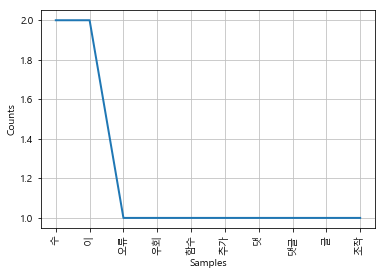

None


In [23]:
print(art.plot(10))

In [26]:
from konlpy.tag import Twitter

In [27]:
t = Twitter()

In [38]:
tokens = t.nouns(text)

In [39]:
art = nltk.Text(tokens)

In [40]:
art.vocab()

FreqDist({'특검': 13, '조작': 11, '일': 11, '사건': 10, '팀': 10, '댓글': 9, '등': 8, '것': 8, '공감': 7, '개': 6, ...})

In [41]:
list(art.vocab())

['오류',
 '우회',
 '함수',
 '추가',
 '개',
 '동원',
 '댓글',
 '만',
 '공감',
 '수',
 '조작',
 '휴대전화',
 '가능',
 '킹크랩',
 '사용',
 '범행',
 '사건',
 '서울중앙지법',
 '합의',
 '부',
 '병합',
 '신청',
 '서울',
 '뉴시스',
 '전진환',
 '기자',
 '드루',
 '킹',
 '의혹',
 '수사',
 '특별검사',
 '팀',
 '특검',
 '익범',
 '지난',
 '일',
 '오후',
 '서초구',
 '사무실',
 '브리핑',
 '오제',
 '채',
 '중인',
 '사법연수원',
 '기',
 '심',
 '선고',
 '김모',
 '씨',
 '등',
 '인',
 '기소',
 '김씨',
 '서유기',
 '박모',
 '솔',
 '아르타',
 '양모',
 '둘리',
 '우모',
 '업무방해',
 '혐의',
 '월',
 '총',
 '와',
 '매크로',
 '자동',
 '입력',
 '반복',
 '프로그램',
 '모두',
 '기사',
 '각',
 '비',
 '회',
 '것',
 '조사',
 '법원',
 '제출',
 '범죄',
 '일람표',
 '권',
 '전해진',
 '이',
 '일당',
 '이번',
 '기존',
 '에서',
 '버전',
 '업데이트',
 '를',
 '변동',
 '인터넷',
 '정보',
 '사용자',
 '기능',
 '통합',
 '위해',
 '자체',
 '명령어',
 '아마존',
 '서버',
 '실행',
 '구분',
 '의',
 '경우',
 '휴대',
 '전화',
 '게',
 '설명',
 '통해',
 '비용',
 '절감',
 '데',
 '네이버',
 '포털사이트',
 '어뷰징',
 '단속',
 '피',
 '해갈',
 '파악',
 '앞서',
 '추정',
 '과정',
 '이전',
 '의심',
 '약',
 '만건',
 '대한',
 '분석',
 '작업',
 '병행',
 '고',
 '확인',
 '다수',
 '전문',
 '인력',
 '투입',
 '측',
 '관련',
 '진술',
 '확보',


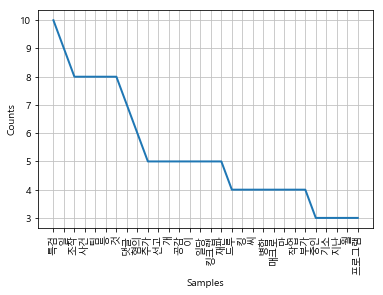

None


In [35]:
print(art.plot(30))

In [42]:
from matplotlib import pyplot

In [45]:
global_unique = []
global_unique_count=[]

for row in text.split("\n"):
    term = t.nouns(row)
    unique = set(term)
    global_unique += list(unique)
    global_unique = list(set(global_unique))   #set으로 바꿔서 중복제거
    global_unique_count.append(len(global_unique))
    print(len(unique), len(global_unique))

0 0
0 0
0 0
0 0
0 0
4 4
0 4
0 4
151 154
0 154
0 154


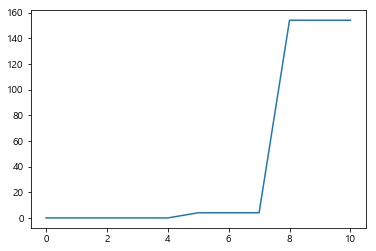

In [46]:
pyplot.plot(global_unique_count)  #각 단계마다 unique의 갯수
pyplot.savefig("test.png")

In [53]:
stopwords = ["드루킹"]

In [59]:
count = 0
for src in text.split():
    src = re.sub("[^ㄱ-ㅎㅏ-ㅣ가-힣]", "", src)
    
    for temp in ngram(src, 3):
        if temp in stopwords:
            count = count +1
            
print(count)

4


In [50]:
def ngram(src, n=2):
    result = []
    for i in range(len(src)):
        result.append(src[i:i+n])
    return result